# Análise de dados SPRINT 4
Pesquisa utilizada: COVIDiSTRESS (Os dados gerados pela pesquisa original podem ser encontrados no site oficial da [OSF](https://osf.io/z39us/))

A pesquisa original foi modificada para garantir a viabilidade e praticidade da análise de dados utilizando Python e suas respectivas bibliotecas para análies e machine learning.

## Grupo OrBit Tech - Turma: A
- **Nome:** Ana Carolina Wichinieski da Costa **RM:** 86878
- **Nome:** André dos Santos Menezes de Souza **RM:** 88112
- **Nome:** Cauê Ogasawara Nascimento **RM:** 86846
- **Nome:** Giulio Cesar Costa Bernardi **RM:** 86993
- **Nome:** Rafael Fernandes Ferreira **RM:** 88345


In [1]:
#TIRAR O QUE ESTIVER COMENDADO
#from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
#from sklearn import datasets # Para carregar dataset pronto no scikit-learn
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import statistics           #Para fazer cálculos estatísticos
import pandas as pd         #Para ler o arquivo csv
import seaborn as sns       #Para desenvolver gráficos
import matplotlib.pyplot as plt     #Para desenvolver gráficos
from scipy.stats import pearsonr    # Para avaliar a precisão do algoritmo
from sklearn import preprocessing   # Para transofmrar dados categóricos em numéricos
from sklearn.neural_network import MLPRegressor         # Importando a Rede Neural MLP para Regressão
from sklearn.linear_model import LinearRegression       # Algoritmo de Regressão para trienar a máquina
from sklearn.model_selection import train_test_split    # Para treinar o algoritmo e fazer com que o mesmo prediga resultados
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # Para avaliar a precisão do algoritmo



Carregando os dados

In [2]:
#Lendo o arquivo csv
dados = pd.read_csv('CovidestressAtualizada1.csv', sep=';', encoding = "ISO-8859-1")

Exemplificando o tamanho do dataset (quantidade de linhas)

In [3]:
# Total de pessoas que responderam essa pesquisa
print(len(dados))

125306


Separando os gêneros do dataset

In [4]:
media_idades_geral = statistics.mean(dados['Idade'])

homens = dados[dados.Genero == 'Male']
mulheres = dados[dados.Genero == 'Female']
sem_genero = dados[(dados['Genero'] != 'Male') & (dados['Genero'] != 'Female')]

qtd_homens = len(homens)
qtd_mulheres = len(mulheres)
qtd_sem_genero = len(sem_genero)

print("Quantidade de homens: ", qtd_homens)
print("Quantidade de mulheres: ", qtd_mulheres)
print("Quantidade de pessoas que não quiseram dizer seu gênero: ", qtd_sem_genero)

Quantidade de homens:  33126
Quantidade de mulheres:  90400
Quantidade de pessoas que não quiseram dizer seu gênero:  1780


Plotando gráfico de barras para exibir a diferença entre a quantidade de pessoas de cada gênero

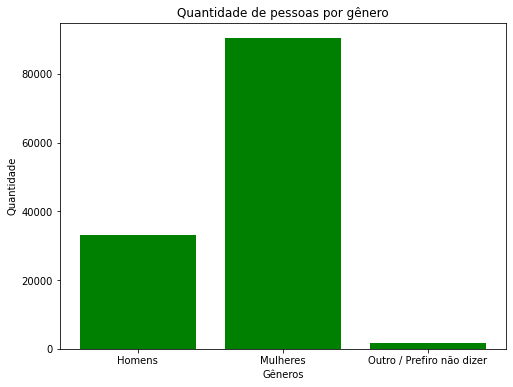

In [5]:
quantidade = [qtd_homens, qtd_mulheres, qtd_sem_genero]
generos = ["Homens", "Mulheres", "Outro / Prefiro não dizer"]
plt.figure(figsize=(8, 6))
plt.xlabel("Gêneros")
plt.ylabel("Quantidade")
plt.title("Quantidade de pessoas por gênero")
plt.bar(generos, quantidade, color='g')
plt.show()

# Interpretação

A grande maioria dos entrevistados é mulher, eunquanto quase 40 mil entrevistados é homem, e menos de 5 mil entrevistados decidiram não responder seu sexo.

[Text(0.5, 0, 'Alternativas'), Text(0, 0.5, 'Quantidade de vezes escolhida')]

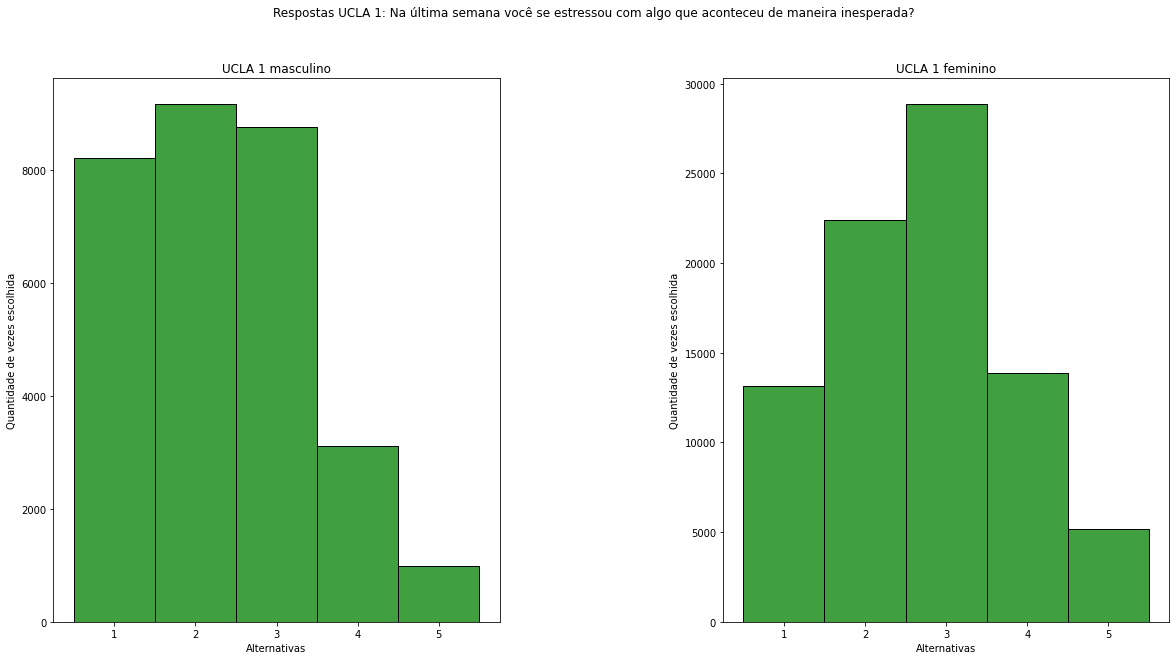

In [6]:
ucla_um_masculino = []
ucla_um_feminino = []

for i in range(len(dados)):
    if(dados['Genero'][i] == 'Male'):
        ucla_um_masculino.append(dados['PSS10_UCLA_1'][i])
    elif(dados['Genero'][i] == 'Female'):
        ucla_um_feminino.append(dados['PSS10_UCLA_1'][i])

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Respostas UCLA 1: Na última semana você se estressou com algo que aconteceu de maneira inesperada?')

sns.histplot(ax=axes[0],
            data=ucla_um_masculino,
            bins=10,
            color = 'green',
            discrete=(True, False)
            )

sns.histplot(ax=axes[1],
            #data=ucla_um_feminino,
            data=ucla_um_feminino,
            color = 'green',
            bins=30, 
            discrete=(True, False)
            )


plt.subplots_adjust(wspace = 0.5, hspace=0.3)

axes[0].set_title("UCLA 1 masculino")
axes[0].set(xlabel='Alternativas', ylabel='Quantidade de vezes escolhida')

axes[1].set_title("UCLA 1 feminino")
axes[1].set(xlabel='Alternativas', ylabel='Quantidade de vezes escolhida')

# Sobre UCLA
## Ucla 1: 'Na última semana você se estressou com algo que aconteceu de maneira inesperada?'
Respostas possíveis: <br />
1-Nunca<br />
2-Quase nunca<br />
3-As vezes<br />
4-Quase sempre<br />
5-Sempre<br />

# Interpretação

Proporcionamente, homens se estressam menos do que as mulheres com situações inesperadas.<br />
Poucos homens se sentem sempre estressados com situações inesperadas. <br />
Apesar de serem a minoria, muitas mulheres se estressam sempre em situações inesperadas. <br />
Raramente as mulheres não se sentem estressadas com situações inesperadas. <br />
A maioria dos homens não se estressa ou se estressa muito pouco

[Text(0.5, 0, 'Alternativas'), Text(0, 0.5, 'Quantidade de vezes escolhida')]

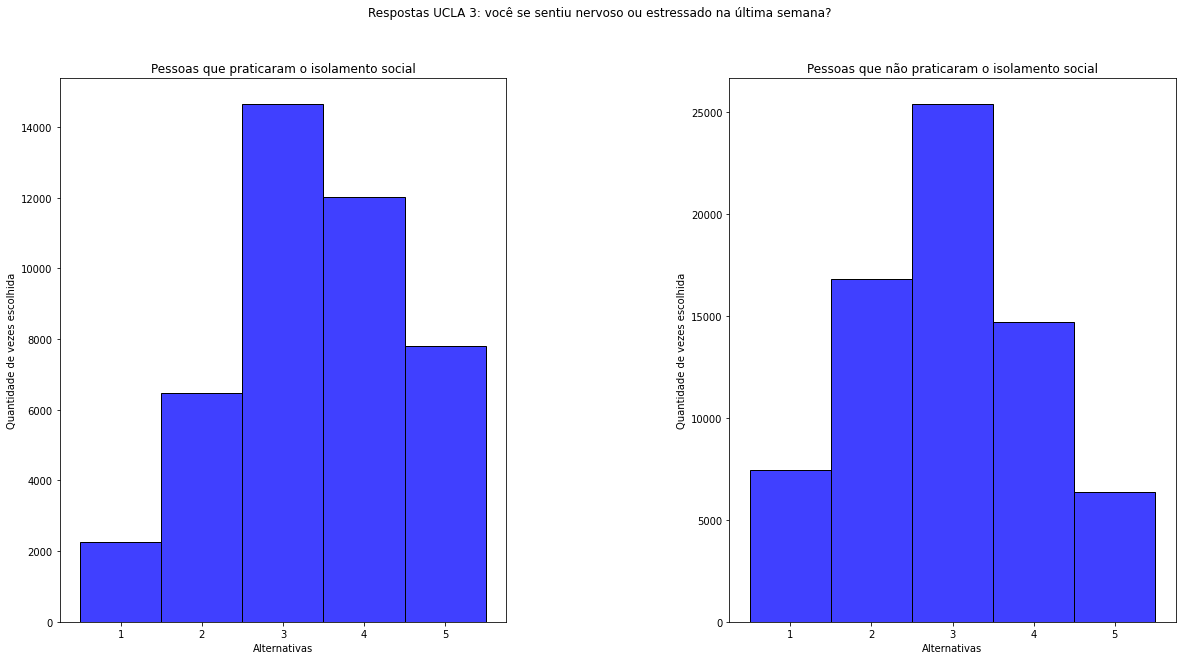

In [7]:
pessoas_isoladas = []
pessoas_n_isoladas = []

#pss ucla 3 = você se sentiu nervoso ou estressado na última semana?
for i in range(len(dados)):
    if(dados['IsolamentoSocial'][i] == "Isolated" or dados['IsolamentoSocial'][i] == "Isolated in medical facility of similar location"):
        pessoas_isoladas.append(dados['PSS10_UCLA_3'][i])
    elif(dados['IsolamentoSocial'][i] == "Life carries on with minor changes" or dados['IsolamentoSocial'][i] == "Life carries on as usual"):
        pessoas_n_isoladas.append(dados['PSS10_UCLA_3'][i])

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Respostas UCLA 3: você se sentiu nervoso ou estressado na última semana?')

sns.histplot(ax=axes[0],
            #data=ucla_um_masculino,
            data=pessoas_isoladas,
            bins=10,
            color = 'blue',
            discrete=(True, False)
            )

sns.histplot(ax=axes[1],
            #data=ucla_um_feminino,
            data=pessoas_n_isoladas,
            color = 'blue',
            bins=30, 
            discrete=(True, False)
            )


plt.subplots_adjust(wspace = 0.5, hspace=0.3)

axes[0].set_title("Pessoas que praticaram o isolamento social")
axes[0].set(xlabel='Alternativas', ylabel='Quantidade de vezes escolhida')

axes[1].set_title("Pessoas que não praticaram o isolamento social")
axes[1].set(xlabel='Alternativas', ylabel='Quantidade de vezes escolhida')


# Sobre UCLA

Pergunta UCLA 3: Com qual frequência você se sentiu nervoso/ansioso durante a útlima semana
Respostas possíveis: <br />
1-Nunca<br />
2-Quase nunca<br />
3-As vezes<br />
4-Quase sempre<br />
5-Sempre<br />

# Interpretação
Proporcionalmente, as pessoas que não se isolaram nunca se sentiram estressadas/nervosas.<br />
Dificilmente as pessoas que se isolaram nunca se sentiram nervosas.<br />
Pessoas que não praticaram o isolamento social foram menos afetadas por nervosismo/estresse<br />
Grande parte das pessoas que se isolaram se sentiram quase sempre ou sempre estressadas.<br />
O mais comum foram as pessoas que se sentiram estressadas/nervosas as vezes<br />


In [8]:
publico_alvo = []
maior_trinta = []
maior_quarenta = []

for i in range(len(dados)):
    if(dados['Idade'][i] < 35):
        publico_alvo.append(dados['Genero'][i])
    elif(dados['Idade'][i] >= 35 and dados['Idade'][i] < 50):
        maior_trinta.append(dados['Genero'][i])
    else:
        maior_quarenta.append(dados['Genero'][i])

Quantidade de dados:  125306


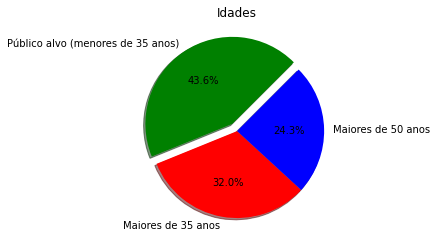

In [9]:
idades = [len(publico_alvo), len(maior_trinta), len(maior_quarenta)]
nomes = ["Público alvo (menores de 35 anos)", "Maiores de 35 anos", "Maiores de 50 anos"]
pula = [0.1, 0, 0]
cores = ["g","r","b"]

print("Quantidade de dados: ", len(dados))
plt.title("Idades")
plt.pie(idades, labels=nomes, autopct='%1.1f%%', shadow=True, startangle=45, explode=pula, colors=cores)
plt.show()

# Interpretação

Quase a metade dos entrevistados é composta por pessoas que estão dentro do nosso público alvo(menores de 35 anos). <br />
mesmo sendo a minoria, muitos entrevistados tem mais do que 50 anos de idade

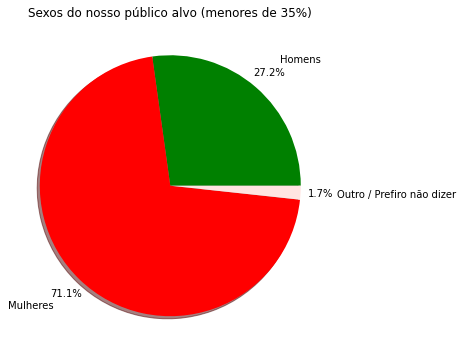

In [10]:
masculino = [(i) for i in publico_alvo if i=="Male"]
feminino = [(i) for i in publico_alvo if i=="Female"]
outro = [(i) for i in publico_alvo if i!="Male" and i!="Female"]

generos = [len(masculino), len(feminino), len(outro)]
nomes_generos = ["Homens", "Mulheres", "Outro / Prefiro não dizer"]
cores = ["green","r","mistyrose"]

plt.figure(figsize=(8, 6))

plt.title("Sexos do nosso público alvo (menores de 35%)")
plt.pie(generos, labels=nomes_generos, autopct='%1.1f%%', shadow=True, startangle=0, colors=cores, pctdistance=1.15, labeldistance=1.28)
plt.show()

# Interpretação
A maioria do nosso público alvo são as mulheres<br />
Poucas pessoas do nosso público alvo decidiram não dizer qual era o seu sexo

# __Aprendizado de máquina__

## Algoritmo utiliozado: REGRESSÃO.
### Objetivo: Predizer se a pessoa é casada, divorciada ou solteira dependendo de suas respostas UCLA e SLON.

Selecionando as pessoas do nosso público alvo (pessoas que tem menos de trinta e cinco anos)

In [3]:
#Dataframe contendo apenas pessoas que fazem parte do nosso público alvo
df_publico_alvo = dados.loc[(dados['Idade'] < 35)]

Dropando todas as colunas não úteis para o algoritmo e mantendo apenas as úteis.

In [4]:
df_publico_alvo.drop(dados.columns.difference(['PSS10_UCLA_1','PSS10_UCLA_2','PSS10_UCLA_3','PSS10_UCLA_4','PSS10_UCLA_5','PSS10_UCLA_6','PSS10_UCLA_7','PSS10_UCLA_8','PSS10_UCLA_9','PSS10_UCLA_10','PSS10_avg','SLON3_avg','EstadoCivil']), 1, inplace=True)

C:\Users\GIULIO~1\AppData\Local\Temp/ipykernel_13344/3218244341.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_publico_alvo.drop(dados.columns.difference(['PSS10_UCLA_1','PSS10_UCLA_2','PSS10_UCLA_3','PSS10_UCLA_4','PSS10_UCLA_5','PSS10_UCLA_6','PSS10_UCLA_7','PSS10_UCLA_8','PSS10_UCLA_9','PSS10_UCLA_10','PSS10_avg','SLON3_avg','EstadoCivil']), 1, inplace=True)
C:\Users\Giulio Cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Retirando linhas que possuem pelo menos um 'NA'
Por padrão, a função 'dropna()' utiliza o parâmetro 'how='any', que exclui uma linha inteira mesmo se apenas uma coluna possuir NA

In [5]:
df_publico_alvo = pd.DataFrame(data=df_publico_alvo).dropna()

Transformando dados categóricos em numéricos
Exemplo:<br />
O dado 'casado' se transforma em 0 <br />
O dado 'Divorciado' se transforma em 1 <br />
O dado 'Solteiro' se tranforma em 2 <br />
E assim consequentemente

In [7]:
label_encoder = preprocessing.LabelEncoder() 
df_publico_alvo['EstadoCivil'] = label_encoder.fit_transform(df_publico_alvo['EstadoCivil'])

Retirando a coluna de resultado desejada para que o altoritmo possa treinar da maneira correta (sem ter as respostas)
Atribuindo às variáreis os valores da classe alvo através da função 'train_test_split()' 

In [34]:
x = df_publico_alvo.drop(columns='PSS10_avg')
y = df_publico_alvo['PSS10_avg'] #Classe alvo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Instanciando um objeto da classe 'LinearRegression()' para usar os seus métodos, sendo assim, utilizando o 'fit()' para passar os dados para possibilitar o computador a treinar

In [35]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
y_predicoes = lr.predict(x_test)

In [37]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  1.2690601749432262e-15


In [38]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)

MSE:  2.476509101531625e-30


In [39]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  1.0


In [40]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apneas neste caso de utilização)

ρ: 0.9999999999999981


In [41]:
a_modelo = lr.coef_      # Coeficientes angulares do modelo (cada um mede a influência de cada coluna)
b_modelo = lr.intercept_ # Coeficiente linear do model

In [42]:
print(a_modelo, b_modelo)

[2.56002423e-17 1.00000000e-01 1.00000000e-01 1.00000000e-01
 1.00000000e-01 1.00000000e-01 1.00000000e-01 1.00000000e-01
 1.00000000e-01 1.00000000e-01 1.00000000e-01 2.42861287e-16] -3.9968028886505635e-15


In [43]:
R2_treinamento = lr.score(x_train, y_train)
print(R2_treinamento)

1.0


In [44]:
y_pred_linear = y_predicoes # Salvando as informações do Modelo Reg Linear para comparar depois

In [45]:
from sklearn.preprocessing import StandardScaler # Importando o Escalonador de Normalização

In [46]:
# 1.5 - Escalonamento
scaler = StandardScaler() # Criando o objeto de escalonamento
scaler.fit(x_train) # Passando os dados de treinamento para encontrar a escala

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [47]:
y_predicoes_mlp = y_predicoes

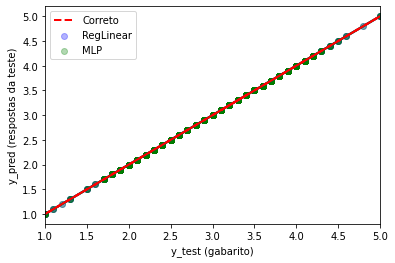

In [48]:
ax = sns.regplot(x=y_test,y=y_pred_linear,
                 color="b", scatter_kws={'alpha':0.3}, label='RegLinear') # Regressão Linear
ax = sns.regplot(x=y_test,y=y_predicoes_mlp,
                 color="g", scatter_kws={'alpha':0.3}, label='MLP') # Rede Neural
ax.plot(y_test, y_test, 'r--', linewidth = 2, label='Correto') # Reta 100% correto
ax.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas da teste)') 
ax.legend()

In [49]:
from sklearn.neural_network import MLPRegressor # Importando a Rede Neural MLP para Regressão

In [50]:
# 2 - Treino
# Instanciando o objeto
ml_perceptron = MLPRegressor(solver='lbfgs', # otimizador por métodos quasi-Newton
                             tol=1e-5, # Limiar para a otimização (treinamento)
                             max_iter=1500, # Limite de iterações durante a otimização (treinamento)
                             random_state=42, # (seed) pesos da rede são inicializados aleatoriamente
                             hidden_layer_sizes=(12,7,4), # Quantidade de neuronios por camada oculta #(12,7,3)
                             activation='relu') # Função de ativação dos neuronios

ml_perceptron.fit(x_train, y_train)  # Treinando (perceba que estamos passando o x_train escalonado)

MLPRegressor(hidden_layer_sizes=(12, 7, 4), max_iter=1500, random_state=42,
             solver='lbfgs', tol=1e-05)

In [51]:
# 3 - Teste
y_predicoes = ml_perceptron.predict(x_test) # Perceba que estamos passando o x_test escalonado

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apneas neste caso de utilização)

R2:  0.9999784534143537
ρ: 0.9999892285272197


In [52]:
y_predicoes_mlp = y_predicoes

In [53]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  0.0005828647116834158


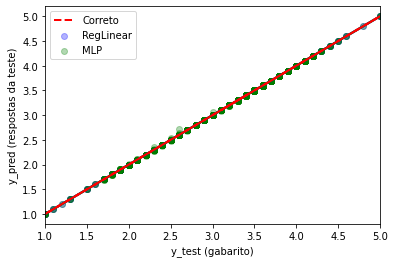

In [54]:

ax = sns.regplot(x=y_test,y=y_pred_linear,
                 color="b", scatter_kws={'alpha':0.3}, label='RegLinear') # Regressão Linear
ax = sns.regplot(x=y_test,y=y_predicoes_mlp,
                 color="g", scatter_kws={'alpha':0.3}, label='MLP') # Rede Neural
ax.plot(y_test, y_test, 'r--', linewidth = 2, label='Correto') # Reta 100% correto
ax.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas da teste)') 
ax.legend()